#  Feature Engineering

A loan default prediction data set has been sent to us by an American finance company. Information on prior loan applicants and whether or not they "defaulted" is included in the data provided. The goal is to find patterns that suggest if an individual is likely to default. These patterns can then be used to decide whether to deny a loan, reduce the loan amount, or charge a higher interest rate to applicants who pose a risk. Credit scores, the number of financing inquiries, address specifics like zip codes and states, and collections are examples of features, sometimes referred to as variables. The data set consists of a matrix with 150 variables and about 860,000 observations. 


In [30]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
#load the data into a pandas dataframe (train.csv, test.csv, X_train.csv)
train_df = pd.read_csv('train.csv')
valid_df = pd.read_csv('valid.csv')
test_df = pd.read_csv('X_test.csv')

#check the first 5 rows of the dataframe
print(train_df.shape)
print(valid_df.shape)
print(test_df.shape)


(517788, 145)
(172596, 145)
(172596, 144)


In [32]:
train_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status
0,NaN,NaN,14000,14000,14000.0,36 months,7.35,434.53,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,2000,2000,2000.0,36 months,16.29,70.61,D,D2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,5000,5000,4750.0,36 months,7.39,155.28,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,20600,20600,20600.0,36 months,11.99,684.12,B,B5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,10000,10000,10000.0,36 months,7.39,310.56,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1


In [33]:
#split the data into features and target variable
X_train = train_df.drop('loan_status', axis=1)
y_train = train_df['loan_status']

X_valid = valid_df.drop('loan_status', axis=1)
y_valid = valid_df['loan_status']

In [34]:
X_train.isnull().sum()

id                       517788
member_id                517788
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                          ...  
settlement_status        498528
settlement_date          498528
settlement_amount        498528
settlement_percentage    498528
settlement_term          498528
Length: 144, dtype: int64

# Column Removal for handling missing values

In [35]:
#drop columns with missing values using threshold of 50%

X_train = X_train.dropna(thresh=0.5*len(X_train), axis=1)

#get column names of the dataframe
columns = X_train.columns

X_train.shape

(517788, 86)

# Removing Constant Value Columns

In [36]:
#drop columns that has only one unique value
X_train = X_train.loc[:,X_train.apply(pd.Series.nunique) != 1]
#get column names of the dataframe

columns = X_train.columns
X_train.shape

(517788, 81)

In [37]:
#drop columns from the validation set and test set
X_valid = X_valid[columns]
test_df = test_df[columns]


In [38]:
#get categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns
cat_cols


Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [39]:
#get numerical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Imputation Strategies

In [40]:
#get mean and mode of X_train
mean = X_train[num_cols].mean()
mode = X_train[cat_cols].mode().iloc[0]

#fill missing values in the numerical columns with mean
X_train[num_cols] = X_train[num_cols].fillna(mean)
X_valid[num_cols] = X_valid[num_cols].fillna(mean)
test_df[num_cols] = test_df[num_cols].fillna(mean)

#fill missing values in the categorical columns with mode
X_train[cat_cols] = X_train[cat_cols].fillna(mode)
X_valid[cat_cols] = X_valid[cat_cols].fillna(mode)
test_df[cat_cols] = test_df[cat_cols].fillna(mode)

#check for missing values
X_train.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
                             ..
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
disbursement_method           0
debt_settlement_flag          0
Length: 81, dtype: int64

In [41]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,14000,14000,14000.0,36 months,7.35,434.53,A,A4,Paralegal,1 year,...,100.0,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,Cash,N
1,2000,2000,2000.0,36 months,16.29,70.61,D,D2,Teacher,10+ years,...,93.7,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,Cash,N
2,5000,5000,4750.0,36 months,7.39,155.28,A,A4,owner,4 years,...,100.0,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,Cash,N
3,20600,20600,20600.0,36 months,11.99,684.12,B,B5,Teacher,10+ years,...,91.2,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,Cash,N
4,10000,10000,10000.0,36 months,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,97.0,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,Cash,N


In [42]:
#drop grade column
X_train = X_train.drop('grade', axis=1)
X_valid = X_valid.drop('grade', axis=1)
test_df = test_df.drop('grade', axis=1)

#delete grade column from the list of categorical columns
cat_cols = cat_cols.drop('grade')


In [43]:
#get number of unique values in each categorical column
unique_values = X_train[cat_cols].nunique()
unique_values

term                         2
sub_grade                   35
emp_title               175168
emp_length                  11
home_ownership               6
verification_status          3
issue_d                    138
purpose                     14
title                    27117
zip_code                   909
addr_state                  51
earliest_cr_line           709
initial_list_status          2
last_pymnt_d               133
last_credit_pull_d         132
application_type             2
disbursement_method          2
debt_settlement_flag         2
dtype: int64

In [44]:
#et number of unique values equal to 2
binary_cols = unique_values[unique_values == 2].index
binary_cols

Index(['term', 'initial_list_status', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

# **Encoding Categorical Variables**

# •	Label Encoding 

In [45]:
#encode columns with binary values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in binary_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_valid[col] = le.transform(X_valid[col])
    test_df[col] = le.transform(test_df[col])

X_train[binary_cols].head()

,term,initial_list_status,application_type,disbursement_method,debt_settlement_flag
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,1,0,0,0


In [46]:
# emp_title, title,addr_state into lower case letters
X_train['emp_title'] = X_train['emp_title'].str.lower()
X_train['title'] = X_train['title'].str.lower()
X_train['addr_state'] = X_train['addr_state'].str.lower()


X_valid['emp_title'] = X_valid['emp_title'].str.lower()
X_valid['title'] = X_valid['title'].str.lower()
X_valid['addr_state'] = X_valid['addr_state'].str.lower()

test_df['emp_title'] = test_df['emp_title'].str.lower()
test_df['title'] = test_df['title'].str.lower()
test_df['addr_state'] = test_df['addr_state'].str.lower()





# Target Encoding

In [47]:
#use target endoding to encode emp_title , titile and zip_code using y_train mean
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['emp_title', 'title', 'addr_state', 'zip_code'])
encoder.fit(X_train, y_train)
X_train = encoder.transform(X_train)
X_valid = encoder.transform(X_valid)
test_df = encoder.transform(test_df)

In [48]:
#write the data to csv file
X_train.to_csv('X_train6.csv', index=False)
X_valid.to_csv('X_valid6.csv', index=False)

In [49]:
X_train['addr_state'].head()

0    0.649345
1    0.676443
2    0.698458
3    0.698458
4    0.687288
Name: addr_state, dtype: float64

# Label Encoding

In [50]:
#label encode for emp_length , home_ownership, and  purpose
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
X_train['emp_length'] = lencoder.fit_transform(X_train['emp_length'])
X_valid['emp_length'] = lencoder.transform(X_valid['emp_length'])
test_df['emp_length'] = lencoder.transform(test_df['emp_length'])


X_train['home_ownership'] = lencoder.fit_transform(X_train['home_ownership'])
X_valid['home_ownership'] = lencoder.transform(X_valid['home_ownership'])
test_df['home_ownership'] = lencoder.transform(test_df['home_ownership'])

X_train['purpose'] = lencoder.fit_transform(X_train['purpose'])
X_valid['purpose'] = lencoder.transform(X_valid['purpose'])
test_df['purpose'] = lencoder.transform(test_df['purpose'])

X_train[['emp_length', 'home_ownership', 'purpose']]

,emp_length,home_ownership,purpose
0,0,1,2
1,1,1,2
2,4,1,1
3,1,1,2
4,10,1,1
...,...,...,...
517783,3,5,7
517784,4,1,2
517785,1,1,2
517786,1,1,2


# One Hot Encoding

In [51]:
#one hot encode to verification_status using sklearn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
verification_status = encoder.fit_transform(X_train['verification_status'].values.reshape(-1,1)).toarray()
verification_status = pd.DataFrame(verification_status, columns = ['verification_status_' + str(int(i)) for i in range(verification_status.shape[1])])
X_train = pd.concat([X_train, verification_status], axis=1)
X_train = X_train.drop('verification_status', axis=1)

verification_status = encoder.transform(X_valid['verification_status'].values.reshape(-1,1)).toarray()
verification_status = pd.DataFrame(verification_status, columns = ['verification_status_' + str(int(i)) for i in range(verification_status.shape[1])])
X_valid = pd.concat([X_valid, verification_status], axis=1)
X_valid = X_valid.drop('verification_status', axis=1)

verification_status = encoder.transform(test_df['verification_status'].values.reshape(-1,1)).toarray()
verification_status = pd.DataFrame(verification_status, columns = ['verification_status_' + str(int(i)) for i in range(verification_status.shape[1])])
test_df = pd.concat([test_df, verification_status], axis=1)
test_df = test_df.drop('verification_status', axis=1)

#drop verification_status column from the list of categorical columns
cat_cols = cat_cols.drop('verification_status')


In [52]:
#drop date columns 
X_train = X_train.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d',  'last_credit_pull_d'], axis=1)

X_valid = X_valid.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d',  'last_credit_pull_d'], axis=1)

test_df = test_df.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d',  'last_credit_pull_d'], axis=1)

#drop from the list of categorical columns
cat_cols = cat_cols.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d',  'last_credit_pull_d'])


# Ordinal Encoding

In [53]:
#encode subgrade using ordinal encoding using sklearn
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X_train['sub_grade'] = encoder.fit_transform(X_train['sub_grade'].values.reshape(-1,1))
X_valid['sub_grade'] = encoder.transform(X_valid['sub_grade'].values.reshape(-1,1))
test_df['sub_grade'] = encoder.transform(test_df['sub_grade'].values.reshape(-1,1))

X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,verification_status_0,verification_status_1,verification_status_2
0,14000,14000,14000.0,0,7.35,434.53,3.0,0.645924,0,1,...,1.0,67943.0,23659.0,13600.0,48043.0,0,0,1.0,0.0,0.0
1,2000,2000,2000.0,0,16.29,70.61,16.0,0.641054,1,1,...,0.0,9800.0,4168.0,1300.0,0.0,0,0,0.0,0.0,1.0
2,5000,5000,4750.0,0,7.39,155.28,3.0,0.619686,4,1,...,0.0,237800.0,20061.0,64200.0,21600.0,0,0,1.0,0.0,0.0
3,20600,20600,20600.0,0,11.99,684.12,9.0,0.641054,1,1,...,0.0,105100.0,12355.0,15300.0,0.0,0,0,0.0,1.0,0.0
4,10000,10000,10000.0,0,7.39,310.56,3.0,0.747733,10,1,...,1.0,135735.0,141874.0,12000.0,123535.0,0,0,0.0,1.0,0.0


In [54]:
mode = X_train[cat_cols].mode().iloc[0]
X_valid[cat_cols] = X_valid[cat_cols].fillna(mode)
test_df[cat_cols] = test_df[cat_cols].fillna(mode)

In [55]:
X_valid.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,verification_status_0,verification_status_1,verification_status_2
0,14575,14575,14575.0,1,17.57,366.71,16.0,0.676596,1,5,...,0.0,48496.0,25190.0,12200.0,16696.0,0,0,0.0,1.0,0.0
1,10000,10000,10000.0,0,13.59,339.79,11.0,0.562500,3,5,...,1.0,38432.0,30933.0,3800.0,33832.0,0,0,0.0,1.0,0.0
2,17000,17000,17000.0,0,13.35,575.67,11.0,0.757242,1,1,...,0.0,84301.0,79250.0,12200.0,68601.0,0,0,0.0,0.0,1.0
3,4500,4500,4500.0,0,9.93,145.06,6.0,0.597228,1,5,...,0.0,21200.0,5357.0,10400.0,0.0,0,0,0.0,1.0,0.0
4,6250,6250,6250.0,0,12.99,210.56,8.0,0.645556,1,5,...,0.0,41600.0,9811.0,12500.0,0.0,0,0,1.0,0.0,0.0


In [57]:
#csv file
X_train.to_csv('X_train8.csv', index=False)
X_valid.to_csv('X_valid8.csv', index=False)
test_df.to_csv('X_test8.csv', index=False)

# Train the model without feature selection techniques

In [58]:
#Xgboost model
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



#instantiate the xgboost classifier
xgb_clf = xgb.XGBClassifier()

#fit the model
xgb_clf.fit(X_train, y_train)

#make predictions
y_pred = xgb_clf.predict(X_valid)

#calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy without advanced feature engineering techniques: %.2f%%' % (accuracy * 100.0))


Accuracy without advanced feature engineering techniques: 99.93%



# **Filter Method**
# Information Gain 

In [59]:
# feature selection using mutual information
from sklearn.feature_selection import mutual_info_classif

# get mutual information scores
mutual_info = mutual_info_classif(X_train, y_train.values.ravel())
mutual_info

array([1.12295260e-02, 1.00385596e-02, 9.49573354e-03, 3.10480881e-02,
       5.28613947e-02, 3.93606272e-02, 5.16837471e-02, 1.90154612e-01,
       7.71311031e-03, 3.23511955e-02, 2.91383614e-03, 1.87311492e-02,
       5.26878645e-02, 2.69738439e-03, 4.26116428e-03, 8.86519858e-03,
       2.30501619e-03, 1.15786757e-02, 4.27357516e-03, 3.06625489e-03,
       1.92195711e-03, 3.41566383e-03, 2.55180518e-03, 5.73591067e-02,
       1.19744898e-01, 1.16792644e-01, 5.95077673e-01, 3.09176727e-02,
       2.60455295e-02, 3.16339486e-01, 2.97509591e-01, 3.86341839e-01,
       4.51042551e-04, 9.29754038e-04, 0.00000000e+00, 2.13128671e-03,
       4.46059009e-03, 3.40368184e-03, 1.17215843e-02, 5.98381287e-03,
       5.79062682e-03, 3.56596039e-03, 7.45353223e-04, 0.00000000e+00,
       9.60691282e-04, 2.11290308e-03, 4.48033105e-03, 5.55514767e-03,
       9.39483226e-03, 4.16403706e-03, 7.82038060e-03, 8.58787295e-04,
       9.06719431e-03, 8.56548942e-03, 7.76090959e-03, 3.77618851e-03,
      

In [60]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

total_rec_prncp            0.595078
last_pymnt_amnt            0.386342
recoveries                 0.316339
collection_recovery_fee    0.297510
emp_title                  0.190155
                             ...   
disbursement_method        0.000364
acc_now_delinq             0.000000
num_tl_30dpd               0.000000
tax_liens                  0.000000
delinq_amnt                0.000000
Length: 78, dtype: float64

<Axes: >

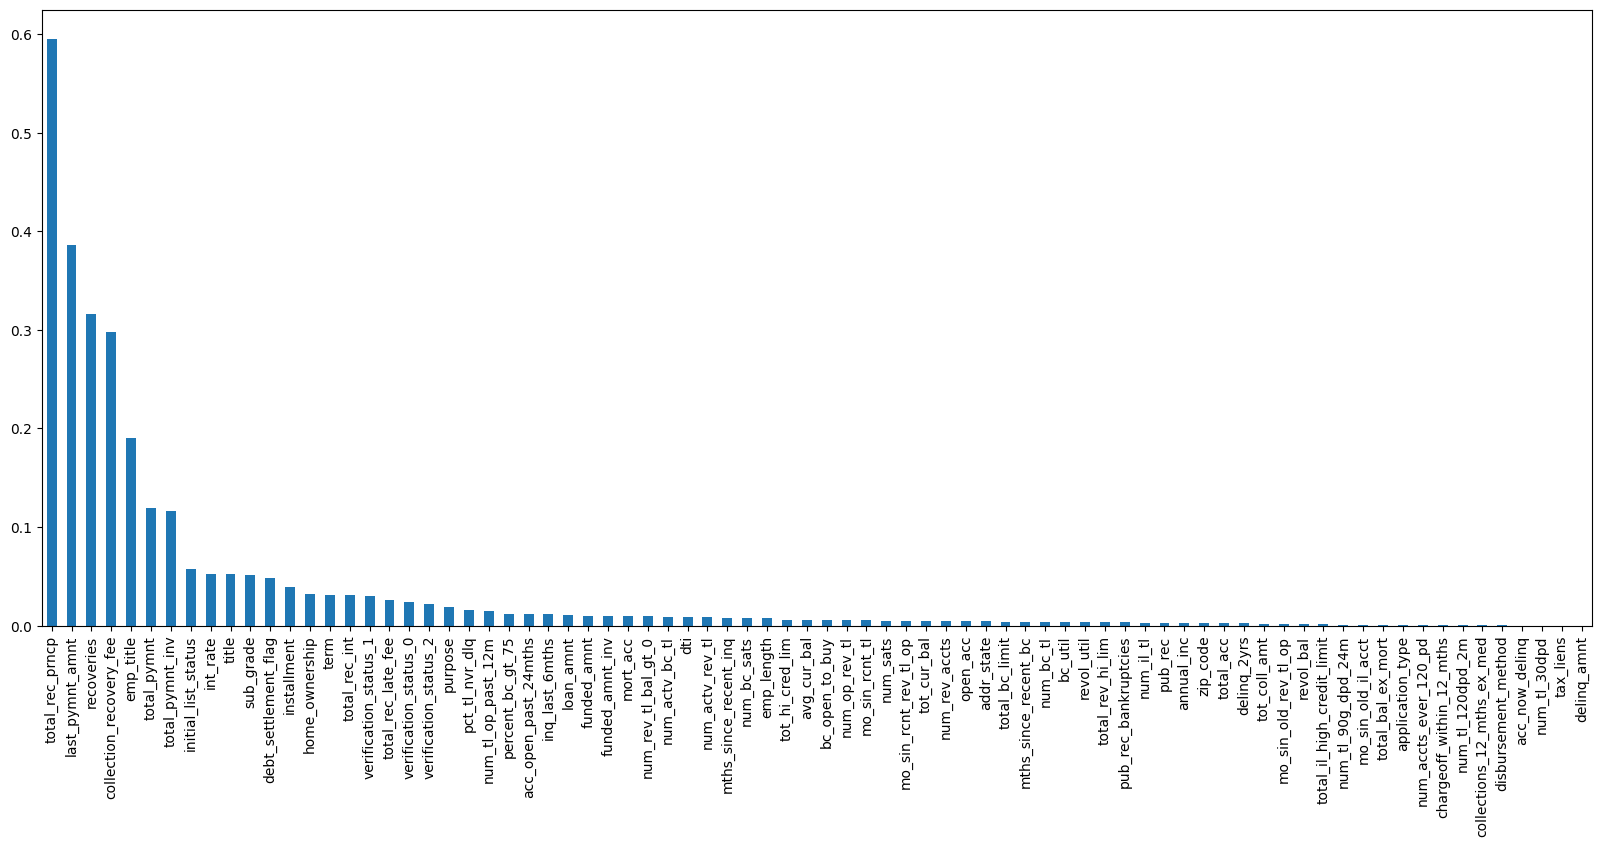

In [61]:
#plot mutual information scores
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

# Get Minimum features for best accuracy

In [62]:


#filter method to select the best features
from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import mutual_info_classif


f1_score_list = []

for feature in range(1,20):
    #instantiate the SelectKBest class



    
    select_k_best = SelectKBest(score_func=mutual_info_classif, k=feature)
    
    #fit the model
    fit_model = select_k_best.fit(X_train, y_train)
    
    #transform the data
    X_train_v1_selected = fit_model.transform(X_train)
    X_test_v1_selected = fit_model.transform(X_valid)

    xgb_clf.fit(X_train_v1_selected, y_train)
    kbest_pred = xgb_clf.predict(X_test_v1_selected)

    #calculate accuracy
    f1_score_best = round(accuracy_score(y_valid, kbest_pred), 5)
    f1_score_list.append(f1_score_best)
    print('Accuracy with %d best features: %.3f%%' % (feature, f1_score_best * 100.0))
    


    


Accuracy with 1 best features: 87.837%
Accuracy with 2 best features: 95.227%
Accuracy with 3 best features: 97.072%
Accuracy with 4 best features: 97.072%
Accuracy with 5 best features: 96.594%
Accuracy with 6 best features: 98.406%
Accuracy with 7 best features: 98.415%
Accuracy with 8 best features: 98.446%
Accuracy with 9 best features: 98.519%
Accuracy with 10 best features: 99.145%
Accuracy with 11 best features: 99.176%
Accuracy with 12 best features: 99.272%
Accuracy with 13 best features: 99.837%
Accuracy with 14 best features: 99.817%
Accuracy with 15 best features: 99.829%
Accuracy with 16 best features: 99.835%
Accuracy with 17 best features: 99.840%
Accuracy with 18 best features: 99.863%
Accuracy with 19 best features: 99.851%


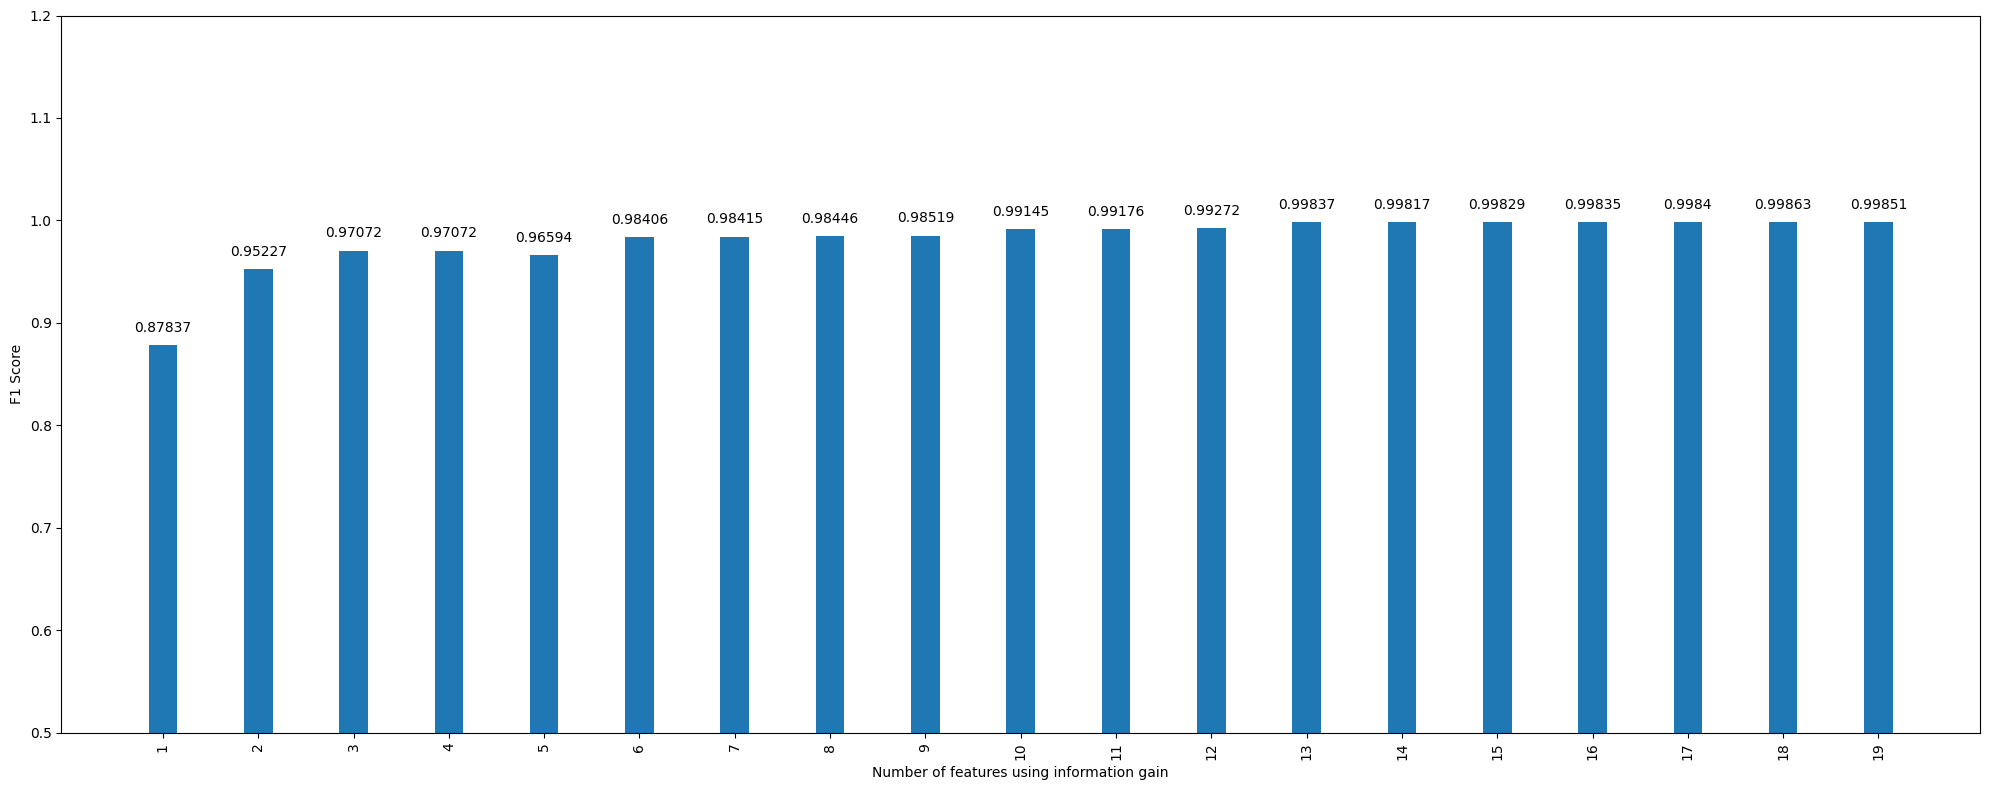

In [69]:
fig, ax = plt.subplots(figsize=(20, 8))

x= range(1, 20)
y = f1_score_list

ax.bar(x, y , width=0.3)
ax.set_xlabel('Number of features using information gain')
ax.set_ylabel('F1 Score')

ax.set_ylim(0.5, 1.2)
ax.set_xticks(range(1, 20))
ax.set_xticklabels(range(1, 20), rotation=90 )

for i, v in enumerate(y):
    ax.text(i+1, v + 0.01, str(v), ha='center', va='bottom')

plt.tight_layout()




In [70]:
# I get 18 best features using mutual information
select_k_best = SelectKBest(score_func=mutual_info_classif, k=18)

#fit the model
fit_model_last = select_k_best.fit(X_train, y_train)

#get the best features
select_feature_mask = fit_model_last.get_support()

selected_features = X_train.columns[select_feature_mask]

selected_features




Index(['term', 'int_rate', 'installment', 'sub_grade', 'emp_title',
       'home_ownership', 'title', 'initial_list_status', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'debt_settlement_flag', 'verification_status_1'],
      dtype='object')

In [71]:

#delete columns that are not in the selected features
X_train_v2 = X_train[selected_features]
X_valid_v2 = X_valid[selected_features]
test_df_v2 = test_df[selected_features]


# Attempt 1

In [81]:
#get the new new xgboost model
xgb_clf.fit(X_train_v2, y_train)

#make predictions
y_pred_v2 = xgb_clf.predict(X_valid_v2)

#calculate accuracy
accuracy_v2 = accuracy_score(y_valid, y_pred_v2)
print('Accuracy with advanced feature engineering techniques: %.2f%%' % (accuracy_v2 * 100.0))


Accuracy with advanced feature engineering techniques: 99.86%


# **Correlation Matrix**

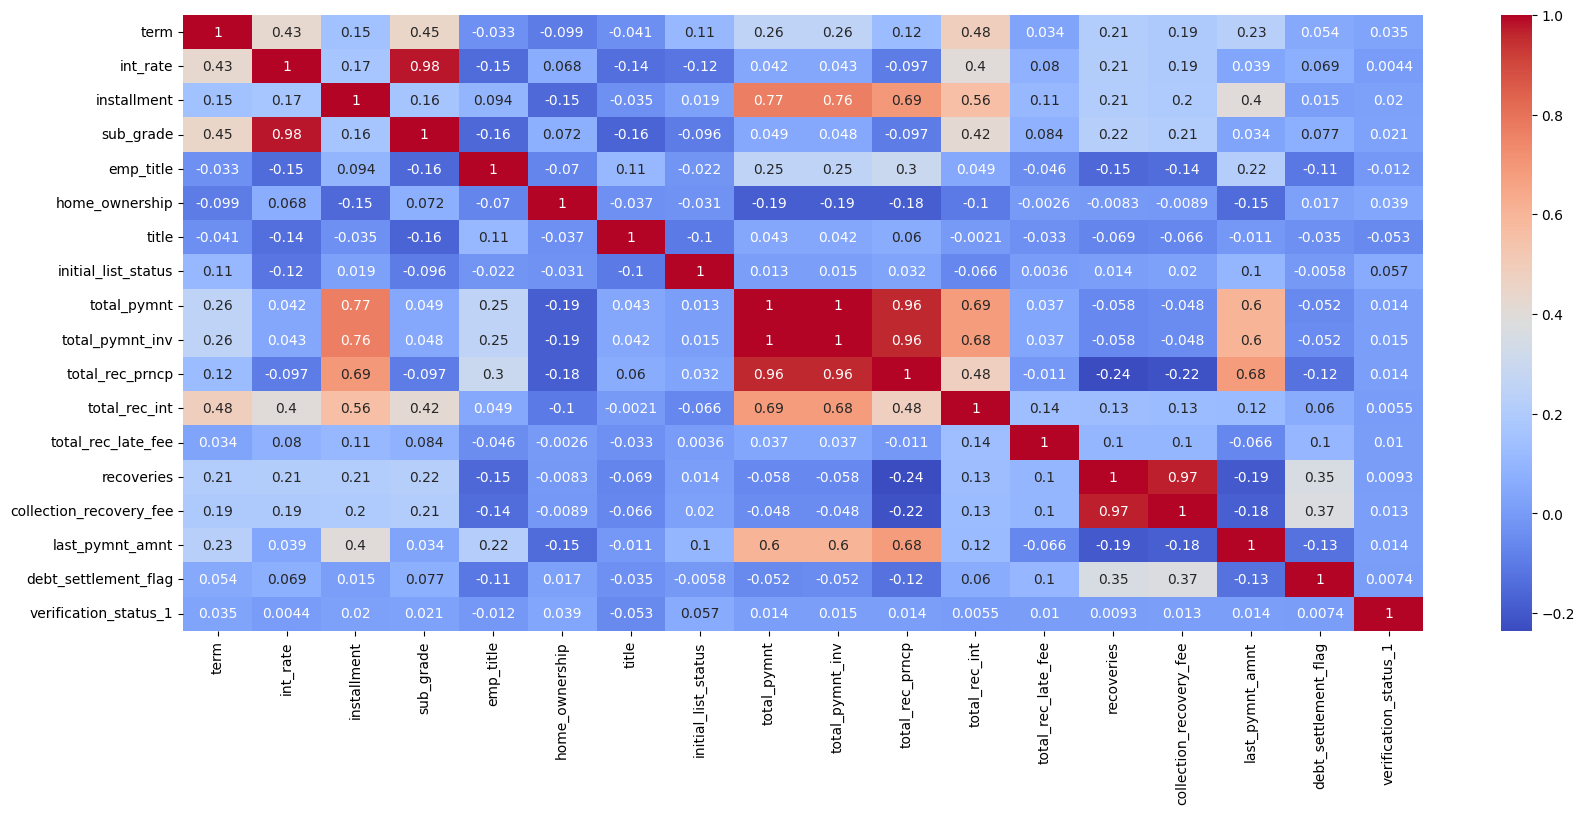

In [82]:
#get correlation matrix
corr_matrix = X_train_v2.corr()

#plot the correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [118]:
#delete columns that are highly correlated
X_train_v3 = X_train_v2.drop(['sub_grade' ], axis=1)
X_valid_v3 = X_valid_v2.drop(['sub_grade' ], axis=1)
test_df_v3 = test_df_v2.drop(['sub_grade'], axis=1)

# **Feature Crossing**

In [119]:


#add feature crossing to the model
X_train_v3['total_pymnt_inv / total_pymnt'] = X_train_v3['total_pymnt_inv'] / X_train_v3['total_pymnt']
X_valid_v3['total_pymnt_inv / total_pymnt'] = X_valid_v3['total_pymnt_inv'] / X_valid_v3['total_pymnt']
test_df_v3['total_pymnt_inv / total_pymnt'] = test_df_v3['total_pymnt_inv'] / test_df_v3['total_pymnt']




#drop total_pymnt_inv and total_pymnt columns
X_train_v3 = X_train_v3.drop(['total_pymnt_inv', 'total_pymnt' ], axis=1)
X_valid_v3 = X_valid_v3.drop(['total_pymnt_inv', 'total_pymnt'], axis=1)
test_df_v3 = test_df_v3.drop(['total_pymnt_inv', 'total_pymnt'], axis=1)





X_train_v3['total_pymnt_inv / total_pymnt'].head()



0    1.000000
1    0.999998
2    0.950000
3    1.000000
4    1.000000
Name: total_pymnt_inv / total_pymnt, dtype: float64

# Attempt 2

In [120]:
#train the model
xgb_clf.fit(X_train_v3, y_train)

#make predictions
y_pred = xgb_clf.predict(X_valid_v3)

#calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy with advanced feature engineering techniques: %.2f%%' % (accuracy * 100.0))


Accuracy with advanced feature engineering techniques: 99.89%


In [111]:
#predict on the test set
y_test = xgb_clf.predict(test_df_v3)
y_test


array([1, 0, 1, ..., 1, 1, 0])

In [112]:
#convert the predictions to a dataframe
y_test_df = pd.DataFrame(y_test, columns=['loan_status'])
y_test_df.head()

,loan_status
0,1
1,0
2,1
3,1
4,0


In [113]:
#concatenate the predictions with the test set
test_df_final = pd.concat([y_test_df,test_df_v3], axis=1)
test_df_final.head()

,loan_status,term,int_rate,installment,emp_title,home_ownership,title,initial_list_status,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,debt_settlement_flag,verification_status_1,total_pymnt_inv / total_pymnt
0,1,0,11.47,267.00,0.641054,5,0.730118,1,8100.00,46.46,0.0,0.00,0.0000,8151.62,0,1.0,1.000
1,0,0,12.99,336.90,0.619686,4,0.565006,1,693.40,310.08,0.0,963.06,173.3508,336.90,0,1.0,1.000
2,1,0,13.67,321.47,0.641054,1,0.769466,1,9450.00,878.80,0.0,0.00,0.0000,7757.04,0,0.0,1.000
3,1,0,17.49,897.43,0.841170,1,0.759083,0,25000.00,7307.33,0.0,0.00,0.0000,946.48,0,0.0,0.999
4,0,1,14.99,380.56,0.597228,1,0.672254,1,6268.46,4754.46,0.0,1346.04,242.2872,380.56,0,0.0,1.000


In [114]:
#get csv file
test_df_final.to_csv('210574A.csv', index=False)

# Shap Analysis

In [123]:
import shap
shap.initjs()


In [124]:
#get shap values
explainer = shap.Explainer(xgb_clf)
shap_values = explainer(X_train_v3)

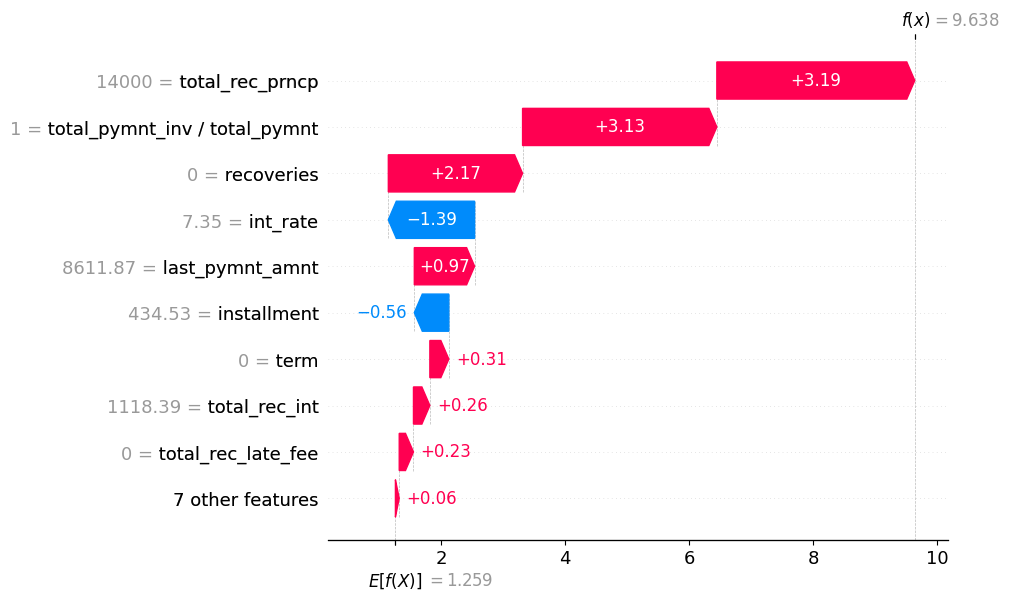

In [130]:
#waterfall plot for the first row
shap.plots.waterfall(shap_values[0])

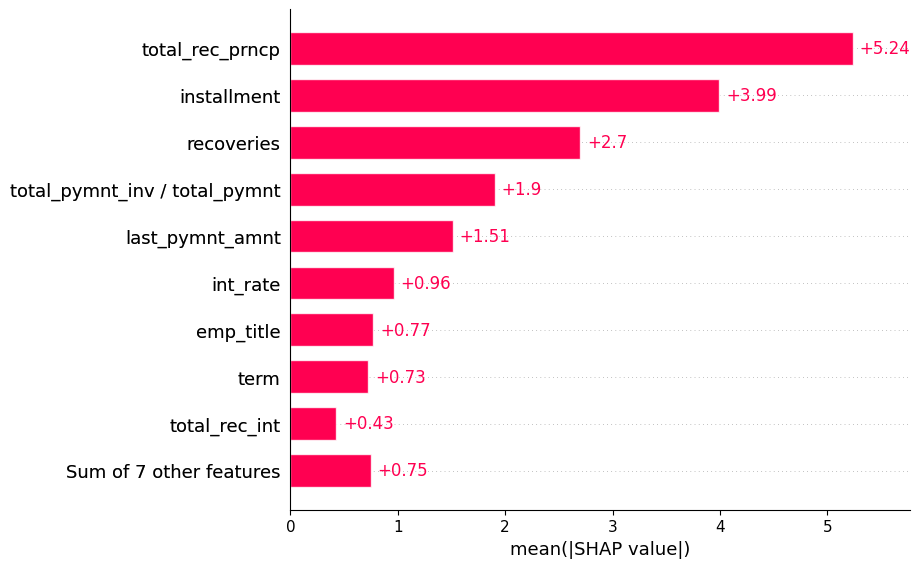

In [132]:
#absolute mean shap bar plot
shap.plots.bar(shap_values.abs.mean(0))


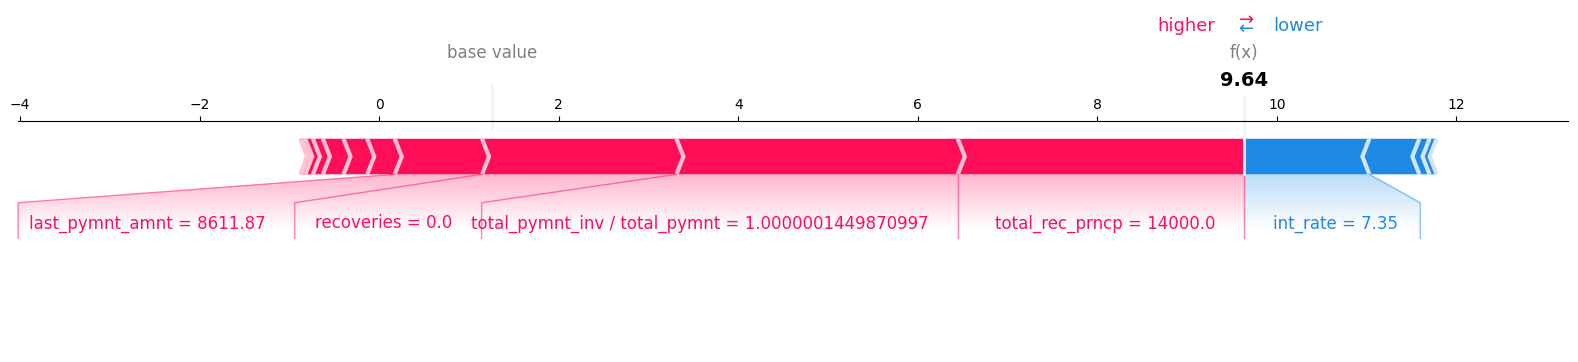

In [133]:
#Stacked force plot
shap.plots.force(shap_values[0], matplotlib=True, show=False)

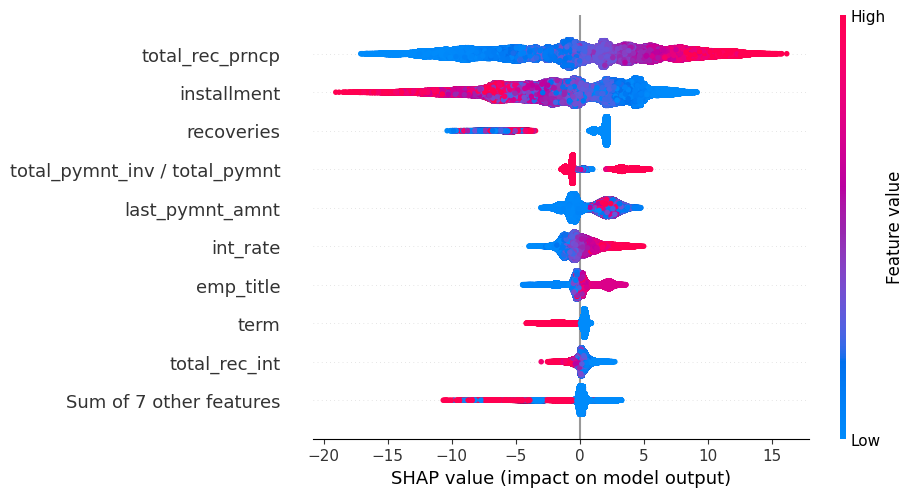

In [135]:
#Beeswarm Plot
shap.plots.beeswarm(shap_values)